In [2]:
%pip install Biopython
%pip install matplotlib
%pip install Levenshtein

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
from Bio import SeqIO, pairwise2 as pw2
from Bio.Seq import Seq
from Bio.SeqIO import SeqRecord
from Bio.SeqUtils import GC, molecular_weight as mw, MeltingTemp as mt
from collections import Counter
from matplotlib import pyplot as plt
from Levenshtein import distance
from Bio.pairwise2 import format_alignment

c:\Python39\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [21]:
#load file
seq1 = SeqIO.read("KY352407.fasta", "fasta")
seq2 = SeqIO.read("OQ297732.fasta", "fasta")

seqa = seq1.seq
seqb = seq2.seq

seqb = seqb.replace("N", "")
seqb = seqb.replace("Y", "")
seqb = seqb.replace("R", "")
seqb = seqb.replace("W", "")
seqb = seqb.replace("M", "")
seqb = seqb.replace("S", "")
seqb = seqb.replace("K", "")

print(seqb)

CGAGTAACTCGTCTATCTTCTGCAGGTTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCATACCTTGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGTGACGTGCTTGTACGTGGCTTTGGAGACTCCGTAGAGGAGGCTTTATCAGAGGCACGTCAACATCTTAAGGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGTGTTTTACCTCAACTCGAACAACCCTATGTGTTCATCAAACGTTCTGATGCTCGAACTGCACCTCATGGCCATGTCATGGTTGAATTGGTTGCAGAACTCGATGGTGTTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTACTTGTCCCCCATGTGGGTGAGGTACCAGTTGCTTACCGTAAAGTTCTTCTTCGTAAGAACGGTAATAAGGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCTTTTGACTTAGGCGACGAGCTTGGAACTGATCCTATTGAAGATTTTCAAGAAAATTGGAACACTAAACATGGCAGTGGTGTTACCCGTGAACTCAAGCGTGAGCTCAACGGGGGTGCATATACTCGCTATGTAGACAACAACTTTTGTGGCCCAGATGGCTACCCCCTTGAGTGCATTAAAGACCTTCTGGCTCGTGCTGGTAAGGCTTCTTATGCTTTGTCTGAACAATTGGATTTTATTGACACTAAGAGAGGTGTTTACTGCTGCCGTGGACACGAGCATGAAATTGCTTGGTACACGGAACGCTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAGTTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAGTTTTGTATTTCCTCTAAATTCAACAATCAAGACCATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGTTTCATGGGCAGAA

## no 1

In [5]:
print(len(seqa))
print(len(seqb))

29274
29050


In [6]:
print(seqa.find("CGC"))
print(seqb.find("CGC"))

117
512


In [7]:
six = seqa[:6]
nine = seqb[-9:]

seqc = (six + nine)[::-1]

print(seqc)

GCCTATCGTGAAAAT


## no 2

In [8]:
#a

print(mt.Tm_Wallace(seqa))
print(mt.Tm_Wallace(seqb))
print(mt.Tm_Wallace(seqc))

81508.0
80772.0
42.0


In [9]:
#b 
print(GC(seqa))
print(GC(seqb))
print(GC(seqc))
print(100 - GC(seqa))
print(100 - GC(seqb))
print(100 - GC(seqc))

39.21568627450981
39.0223752151463
40.0
60.78431372549019
60.9776247848537
60.0


c:\Python39\lib\site-packages\Bio\SeqUtils\__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


In [10]:
#c
print(mw(seqa))
print(mw(seqb))
print(mw(seqc))

9050161.841500323
8978271.984700456
4655.9837


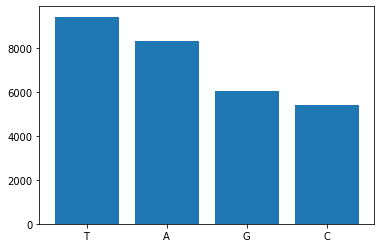

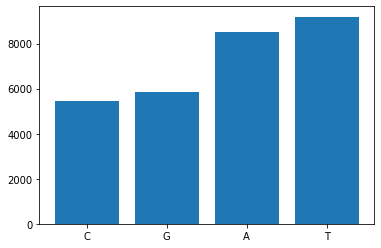

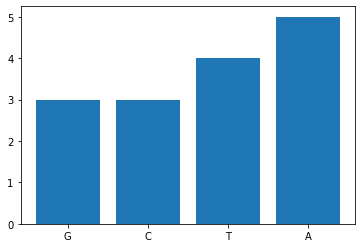

In [11]:
#d
counta = Counter(seqa)
countb = Counter(seqb)
countc = Counter(seqc)

plt.bar(counta.keys(), counta.values())
plt.show()
plt.bar(countb.keys(), countb.values())
plt.show()
plt.bar(countc.keys(), countc.values())
plt.show()


## no 3

In [28]:
print(seqa.transcribe())
print(seqb.transcribe())
print(seqc.transcribe())

print(seqa.translate())


UAAAAGGAUUAAUCCUUCCCGGAAAAUCCUACCAAUCUCGAUCUCUUGCAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUACUUGUCACUUGGCUGUAUGCCCAGUGCAUUUACGCAGUAUAAAUUAUAAUUUUUACUGUCGUUGACAGGAAACGAGUAACUCGUCCGUCUUCUGCAGGUUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCAUACCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACUCACGUCCAACUCAGUUUACCUGUUUUACAGGUUAGCGACGUGCUAGUACGUGGAUUUGGUGAUACUGUUGAAGAAGCUAUCACUGAAGCACGUCAACAUUUAAUAGAUGGAACAUGUGGCAUUAUCAGUCUCCAGAAGGGUGUUUUACCCCAACUGGAACAGCCUUAUGUGUUCCUUAAACGUUCUGAUGCCUUUACUGCACCUCAUGGCCAUGUUAUGGUCGAGUUGGUCGCAGAAUUAAAUGGCAUUCAGUACGGUAGGAGCGGAGAAACGCUUGGUGUCUUAGUGCCACACACGUAUGAGACACCAACUGGUUACCGCAAGGUUCUUGUCCGUAAGAACGGUAAUAAGGGUGCUGGUGGCCAUUGCUACGGAGCCGAUCUAAAGUCUCCAGACUUAGGUGACGAGCUUGGCACUGACCCUAUUGAAGAUUAUGAAAACGACUGGAACACUAAACAUGGCAGUGGACUCAAACGUCAGCUCUUUAGAGAGCUGAAUGGUGGAGUUUACACUCGCUAUGUAGACAACAACUUCUGUGGUCCUGAUGGAUAUCCAUUGGACUGUAUUAAAGACUUGCUUGCUAGGGCCGGCAAAUCUUGUGCUCCACUCUCUGACCAAAUAGACUUUUUACAGUCUAAGAGAGGUGUGUACUGUUGCCGUGAGCAUGAGCAUGAAAUAGCUUGGUUCACUGAUCGCUCUGAGAAG

## no4

In [13]:
all1 = Seq("TGTACATTATAATGCTCTATTTTCTCGC")

score1 = pw2.align.localxx(seqa, all1, score_only=True)
print(score1)

28.0


In [22]:
all2 = Seq("CAGAGTAATGTGTACAGATATTGGGCTC")

score2 = pw2.align.localxx(seqb, all2, score_only=True)
print(score2)

28.0


In [19]:
print(distance(seqa, seqb))

7357
